<a href="https://colab.research.google.com/github/BrendaChepkoech/Swahili-News-Classification-Zindi-Challange/blob/main/Copy_of_SWAHILI_NEWS_CLASSIFICATION_USING_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ZERO TO HERO SWAHILI NEWS CLASSIFICATION USING NLP

## Let's Get Started!!!

#Data Cleaning

##Introduction

This notebook goes through a necessary step of any data science project - data cleaning.

**Data cleaning** is a time consuming and an unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out". Feeding dirty data into a model will give us results that are meaningless.

Specifically, we'll be walking through:

1. Getting the data - in this case, data is provided on [Zindi](https://zindi.africa/competitions/swahili-news-classification/data). 

2. Cleaning the data - we will walk through popular text pre-processing techniques

3. Organizing the data - we will organize the cleaned data into a way that is easy to input into other algorithms

The output of this notebook will be clean, organized data in two standard text formats:

* Corpus - a collection of text
* Document-Term Matrix - word counts in matrix format



# Problem Statement
As a reminder, our goal is to accurately classify each swahili news content into five specified categories below:

* Kitaifa (National)
* Kimataifa (International)
* Biashara (Business)
* Michezo (Sports)
* Burudani (Entertainment)

In [ ]:
# import important libraries
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # classifier 

from sklearn.metrics import log_loss #evaluation metric
from sklearn.feature_extraction.text import CountVectorizer

# text preprocessing modules
import re 
from string import punctuation 

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

## for text processing
import re
import nltk

## for language detection
# !pip install langdetect
# import langdetect 

import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

In [ ]:
# load data
path = '/content/'
train = pd.read_csv(path+"Train.csv")
test = pd.read_csv(path+"Test.csv")
#submission = pd.read_csv(path+"SampleSubmission.csv")

In [ ]:
# show top five rows of train data
train.head() 

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [ ]:
# show top five rows of test data
test.head()

,swahili_id,content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,"MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanah..."
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,"MWISHONI mwa wiki hii, Timu ya Soka ya Taifa,..."
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,THAMANI ya mauzo ya bidhaa za Afrika Masharik...
3,00868eeee349e286303706ef0ffd851f39708d37,MENEJA Mawasiliano na Utetezi wa asasi ya AGP...
4,00a5cb12d3058dcf2e42f277eee599992db32412,"WAZIRI wa Kilimo, Japhet Hasunga amesema seri..."


In [ ]:
# check the shape of the train data and test data
print("Train shape: {} \n".format(train.shape))
print("Test shape: {}".format(test.shape))

Train shape: (5151, 3) 

Test shape: (1288, 2)


In [ ]:
# check missing values in train and test data
print("Is there missing data in the train data?\n\n{}\n".format(train.isnull().sum()))

print("Is there missing data in the test data?\n\n{}".format(test.isnull().sum()))

Is there missing data in the train data?

id          0
content     0
category    0
dtype: int64

Is there missing data in the test data?

swahili_id    0
content       0
dtype: int64


In [ ]:
# evalute news category distribution

train.category.value_counts()

Kitaifa      2000
michezo      1720
Biashara     1360
Kimataifa      54
Burudani       17
Name: category, dtype: int64

### Data Preparation 

In [ ]:
#to detect the language either swa or english
# txt = train["content"].iloc[100]
# print(txt, " --> ", langdetect.detect(txt))

In [ ]:
train.sample(10)

,id,content,category
995,SW2122,"NAIBU Waziri wa Ujenzi, Uchukuzi na Mawasilia...",Kitaifa
429,SW1488,"MAKAMU wa Rais, Samia Suluhu Hassan kesho ana...",Biashara
1756,SW2981,"Waziri wa Fedha, Saada Mkuya Salum alisema ha...",Biashara
4918,SW736,"NAIBU Waziri wa Maliasili na Utalii, Constant...",Kitaifa
3051,SW4433,Kwa mujibu wa taarifa iliyotolewa jana na ben...,Biashara
4596,SW6153,['Kocha wa Liverpool Jurgen Klopp amesema mabi...,michezo
5034,SW865,['Usakaji wa mshambuliaji katika klabu ya Asto...,michezo
2525,SW3846,"Hayo yamesemwa na Naibu Waziri wa Ujenzi, Maw...",Biashara
2259,SW3544,SERIKALI imezindua mradi wa miaka mitatu wa t...,Kitaifa
4272,SW5792,"Akizungumza na watalaamu kutoka Morocco, mjin...",michezo


# Cleaning The Data
When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as **text pre-processing techniques**.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - *start simple and iterate.* Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

Common data cleaning steps on all text:

* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

More data cleaning steps after tokenization:

* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos and more...

In [ ]:
train2 = train.copy()
train2.head(2)

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara


In [ ]:
# # Remove trailing spaces, new lines and tab spaces from data
# train.content = train.content.apply(lambda x: (re.sub('\s+',' ', x)).strip())
# test.content = test.content.apply(lambda x: (re.sub('\s+',' ', x)).strip())
# test.tail()

In [ ]:
print("--- original content ---\n")

print(train.content)

--- original content ---

0        SERIKALI imesema haitakuwa tayari kuona amani...
1        Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...
2        SERIKALI imetoa miezi sita kwa taasisi zote z...
3        KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...
4        WATANZANIA wamekumbushwa kusherehekea sikukuu...
                              ...                        
5146     RAIS John Magufuli ameendelea kung’ara katika...
5147     KAMPENI inayohimiza watafi ti kuandika upya h...
5148     MATUKIO mapya ya malaria kwa kila watu 1,000 ...
5149     IMEELEZWA kuwa hakuna sheria yoyote inayokata...
5150     Akizungumza mara baada ya kutiwa saini kwa ma...
Name: content, Length: 5151, dtype: object


In [ ]:
# a simple function to clean text data 

def clean_text_round1(text):
    # Clean the text data

    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
    text = text.lower()  # set in lowercase 
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
        
    # Return a list of words
    return(text)

round1 = lambda x: clean_text_round1(x)    

In [ ]:
# Let's take a look at the updated text

data_clean = pd.DataFrame(train.content.apply(round1))
data_clean.tail(3)

,content
5148,matukio mapya ya malaria kwa kila watu katika...
5149,imeelezwa kuwa hakuna sheria yoyote inayokata...
5150,akizungumza mara baada ya kutiwa saini kwa ma...


In [ ]:
# Apply a another round of text cleaning techniques
import re
import string

def clean_text_round2(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(train.content.apply(round2))
data_clean

,content
0,serikali imesema haitakuwa tayari kuona amani...
1,mkuu wa mkoa wa tabora aggrey mwanri amesitis...
2,serikali imetoa miezi sita kwa taasisi zote z...
3,kampuni ya mchezo wa kubahatisha ya mbet imei...
4,watanzania wamekumbushwa kusherehekea sikukuu...
...,...
5146,rais john magufuli ameendelea kung’ara katika...
5147,kampeni inayohimiza watafi ti kuandika upya h...
5148,matukio mapya ya malaria kwa kila watu katik...
5149,imeelezwa kuwa hakuna sheria yoyote inayokata...


In [ ]:
# Apply a second round of cleaning
def clean_text_round3(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round3 = lambda x: clean_text_round3(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.content.apply(round3))
data_clean

,content
0,serikali imesema haitakuwa tayari kuona amani...
1,mkuu wa mkoa wa tabora aggrey mwanri amesitis...
2,serikali imetoa miezi sita kwa taasisi zote z...
3,kampuni ya mchezo wa kubahatisha ya mbet imei...
4,watanzania wamekumbushwa kusherehekea sikukuu...
...,...
5146,rais john magufuli ameendelea kungara katika ...
5147,kampeni inayohimiza watafi ti kuandika upya h...
5148,matukio mapya ya malaria kwa kila watu katik...
5149,imeelezwa kuwa hakuna sheria yoyote inayokata...


In [ ]:
#cLEAN THE TEST
test_clean1 = pd.DataFrame(test.content.apply(round1))
test_clean2 = pd.DataFrame(test_clean1.content.apply(round2))
test_clean = pd.DataFrame(test_clean2.content.apply(round3))
test_clean.tail(3)


,content
1285,timu ya taifa ya soka ya tanzania bara kilim...
1286,yanga imetozwa faini ya sh kutokana na makosa...
1287,mahakama kuu kanda ya dar es salaam imekubali...


In [ ]:
train["content"].head()

0     SERIKALI imesema haitakuwa tayari kuona amani...
1     Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...
2     SERIKALI imetoa miezi sita kwa taasisi zote z...
3     KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...
4     WATANZANIA wamekumbushwa kusherehekea sikukuu...
Name: content, dtype: object

In [ ]:
data_clean["content"].head()

0     serikali imesema haitakuwa tayari kuona amani...
1     mkuu wa mkoa wa tabora aggrey mwanri amesitis...
2     serikali imetoa miezi sita kwa taasisi zote z...
3     kampuni ya mchezo wa kubahatisha ya mbet imei...
4     watanzania wamekumbushwa kusherehekea sikukuu...
Name: content, dtype: object

In [ ]:
#Replace content column on train with the clean data.

train['content'] = data_clean.content

In [ ]:
 #!pip install texthero
import texthero as hero
data['clean_content'] = hero.clean(data_clean['content'])
data.head(3)

NameError: ignored

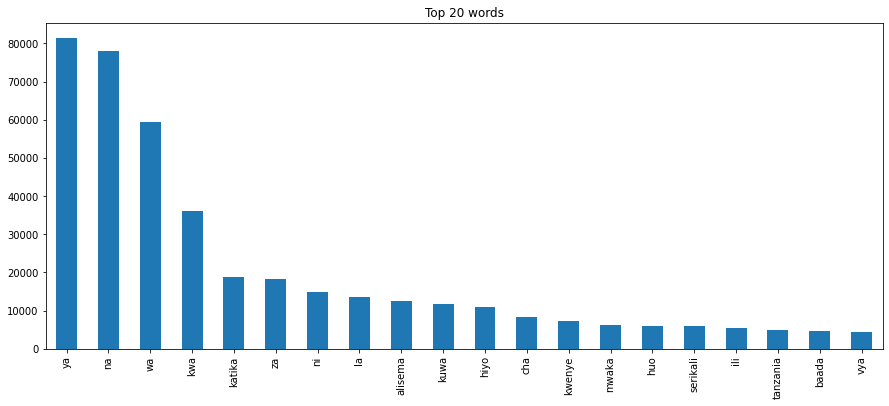

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
#
rcParams["figure.figsize"] = 15, 6
#
top_20 = hero.visualization.top_words(data_clean["content"]).head(20)
# Draw the bar chart
top_20.plot.bar(rot=90, title="Top 20 words")
plt.show(block=True)

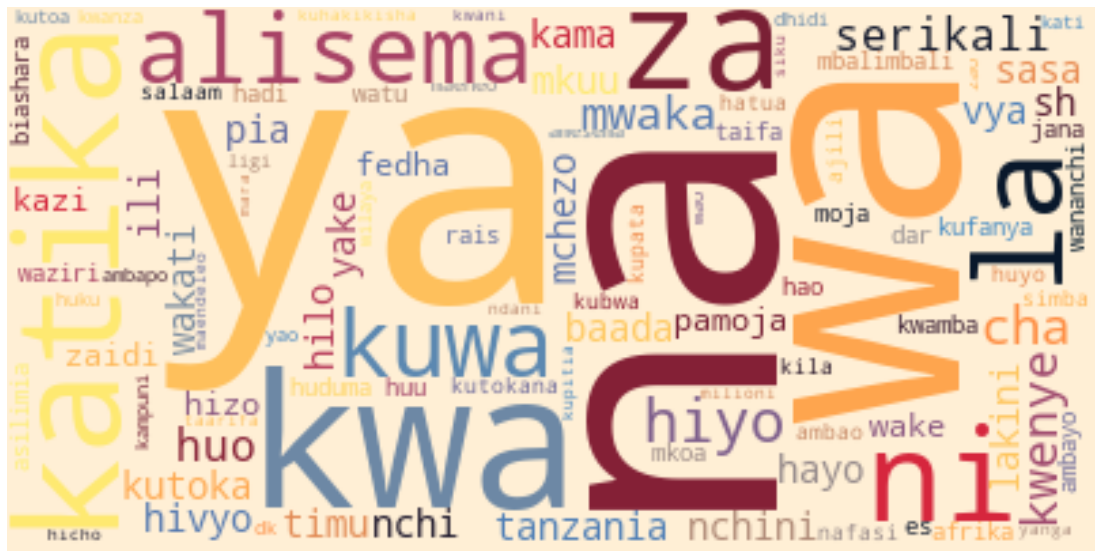

In [ ]:
# Plot wordcloud image using WordCloud
hero.wordcloud(
    data_clean.content, max_words=100,
)

In [ ]:
NUM_TOP_WORDS = 5
data.groupby('category')['clean_content'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

NameError: ignored

In [ ]:
train['category'].value_counts()

Kitaifa      2000
michezo      1720
Biashara     1360
Kimataifa      54
Burudani       17
Name: category, dtype: int64

In [ ]:
# a mapping dictionary that maps the category values from 0 to 5
category_mapping = {
"Kitaifa": 0,
"michezo": 1,
"Biashara": 2,
"Kimataifa": 3,
"Burudani": 4,
}

train["category"] = train.category.map(category_mapping)

train.sample(10)

,id,content,category
2460,SW3769,rais wa wcb na msanii naseeb abdul maarufu ka...,1
2583,SW3917,uanzishwaji wa njia hizo zitakazozinduliwa ra...,2
1491,SW267,tanzania imebaini maeneo mapya ya historia y...,0
5133,SW979,waziri wa viwanda na biashara joseph kakunda ...,2
1066,SW2197,waziri wa katiba na sheria profesa palamagamb...,0
3598,SW5026,wizara ya mambo ya nje na ushirikiano wa afri...,2
1923,SW3168,mabingwa watetezi wa kombe la shirikisho la a...,1
2241,SW3526,kocha wa yanga mwinyi zahera amesema ibrahim ...,1
2635,SW3973,wakati wa maadhimisho ya siku ya mtoto afrika...,0
2763,SW4115,hayo yalisemwa mwishoni mwa wiki na naibu kat...,2


In [ ]:
# another option:
# mapping categorical values
# categorical_mapping = {"kitaifa":0,"michezo":1, "burudani":2 , "kimataifa":3, "uchumi":4, "afya":5}
# train['category'] = train.category.map(categorical_mapping)
# train.head()

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean)
vectorizer.get_feature_names_out()

array(['content'], dtype=object)

In [ ]:
X=vectorizer.get_stop_words()
X

In [ ]:
# We are going to create a document-term matrix using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(data_clean.content)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,aaah,aabdallah,aachane,aache,aachie,aadfi,aafp,aagiza,aagize,aagwa,aah,aaisa,aakia,aal,aalisema,aambatanishe,aamini,aamke,aamue,aanayoifanya,aandamane,aandike,aangalia,aangalie,aanze,aapishwe,aar,aaraby,aarhus,aaron,aatzkongamano,ab,ababa,ababakadushi,ababu,abadilishiwe,abaki,abalora,abaloranaye,...,zrbakihutubia,zrbserikali,zssf,zstc,zstcrais,zstcsaid,zstcserikali,zubeda,zubeir,zubeiry,zuber,zuberi,zubery,zuhura,zuia,zuio,zuioakifungua,zulimwenguni,zulipikaer,zully,zulte,zulu,zuma,zungsong,zungu,zunguka,zungulicha,zura,zuri,zuriamesema,zurich,zuriel,zurituna,zuwena,zuzu,zuzualisema,zuzuamesema,zwa,ádebayor,ùkuaji
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's pickle it for later use
data_clean.to_pickle("corpus.pkl")
train.to_pickle("corpus_train.pkl")

#Exploratory Data Analysis
##Introduction
After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

* Most common words - find these and create word clouds
* Size of vocabulary - look number of unique words and also how quickly someone speaks
* Amount of profanity - most common terms

In [ ]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('corpus_train.pkl')
# data = data.transpose()
data.head()

,id,content,category
0,SW0,serikali imesema haitakuwa tayari kuona amani...,0
1,SW1,mkuu wa mkoa wa tabora aggrey mwanri amesitis...,2
2,SW10,serikali imetoa miezi sita kwa taasisi zote z...,0
3,SW100,kampuni ya mchezo wa kubahatisha ya mbet imei...,1
4,SW1000,watanzania wamekumbushwa kusherehekea sikukuu...,0


In [ ]:
# Find the top 30 news topics
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'category': [(56, 4),
  (4104, 4),
  (672, 4),
  (3329, 4),
  (4859, 4),
  (2267, 4),
  (2290, 4),
  (1409, 4),
  (655, 4),
  (290, 4),
  (2861, 4),
  (2446, 4),
  (4169, 4),
  (3457, 4),
  (2856, 4),
  (1060, 4),
  (521, 4),
  (2033, 3),
  (4781, 3),
  (3430, 3),
  (2027, 3),
  (3487, 3),
  (4786, 3),
  (1895, 3),
  (2041, 3),
  (2050, 3),
  (3358, 3),
  (3491, 3),
  (302, 3),
  (3194, 3)],
 'content': [(2267,
   'wizkid ameshinda tuzo kubwa za marekani za soul train music awards  starboy ameshinda kipengele cha ashford  simpsons songwriter award kupitia collaboration ya brown skin girl aliyoshirikishwa na beyonce'),
  (2906,
   'wizara ya viwanda na biashara imeweka utaratibu maalumu utakaowawezesha wafanyabiashara katika maeneo ya mipakani kutoa taarifa juu ya vikwazo changamoto au kero za kibiashara hasa zile zisizokuwa za kikodi  wanazokutana nazo taarifa iliyotolewa kwa vyombo vya habari na naibu waziri wa viwanda na biashara mhandisi stella manyanya imesema kuwa lengo la kuweka

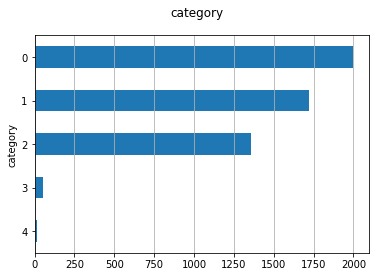

In [ ]:
x = "category"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
train[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()